In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('GBX.csv')

In [3]:
df.shape

(253, 7)

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-02-08,40.650002,43.880001,40.410000,42.200001,41.142357,649200
1,2021-02-09,42.020000,43.810001,41.630001,43.500000,42.409771,370200
2,2021-02-10,43.799999,44.700001,42.320000,44.060001,42.955738,548800
3,2021-02-11,44.230000,44.860001,42.630001,43.500000,42.409771,259700
4,2021-02-12,45.080002,46.750000,44.770000,45.980000,44.827614,712400


In [5]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2021-02-08,2021-02-08,40.650002,43.880001,40.410000,42.200001,41.142357,649200
2021-02-09,2021-02-09,42.020000,43.810001,41.630001,43.500000,42.409771,370200
2021-02-10,2021-02-10,43.799999,44.700001,42.320000,44.060001,42.955738,548800
2021-02-11,2021-02-11,44.230000,44.860001,42.630001,43.500000,42.409771,259700
2021-02-12,2021-02-12,45.080002,46.750000,44.770000,45.980000,44.827614,712400


creating Exponential Moving Average, we put it to standard value of 20. (other typical values could be 15, 20 and 30)

In [7]:
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [8]:
def StochRSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta.dropna()
    high = delta.copy()
    low = delta.copy()
    high[high<0]=0
    low[low>0]=0
    data['high'] = high
    data['low'] = low
    AVG_Gain = EMA(data, period, column='high')
    AVG_Loss = abs(EMA(data,period, column='low'))
    RS = AVG_Gain / AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))
    
    stockrsi = (RSI - RSI.rolling(period).min()) / (RSI.rolling(period).max() - RSI.rolling(period).min())
    
    return stockrsi

In [9]:
df['StochRSI'] = StochRSI(df)

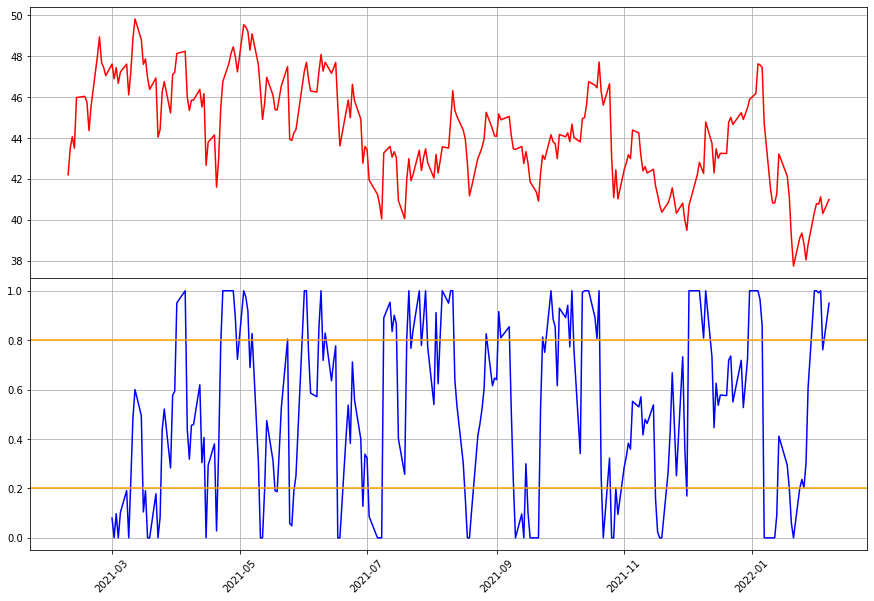

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True,figsize=(15,10))

plt.subplots_adjust(hspace=.0)

ax1.grid()
ax2.grid()

ax1.plot(df.index, df['Close'], color='r')
ax2.plot(df.index, df['StochRSI'], color='b', linestyle='-')

ax2.axhline(0.2, color='orange')
ax2.axhline(0.8, color='orange')

plt.xticks(rotation=45)

plt.show()